# Analisis extra
Acá se analizan los datos por fuera de los requerimientos principales

Primero se procede con importar librerias y datos

In [4]:
#Importar librerias a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#CREACION DE FATA FRAMES
df_metadata = pd.read_csv("c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Metadata.csv")
df_data_type = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Data type.csv')
df_participants = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Participants.csv')
df_self_report = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Self report.csv')
df_emotion_elicitation_techniques = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Emotion elicitation techniques.csv')
df_eda = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - EDA.csv')
df_statistical_learning_models = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Statistical Learning model.csv')
df_performances = pd.read_csv('c:\\Users\\LENOVO\\Downloads\\Review_EDA_Emotion_Recognition\\EMMA\\data\\cleaned\\Tabla Normalizada - Performances.csv')

## 1. Frecuencia de papers por tipo de source (conference, journal, pre-print)

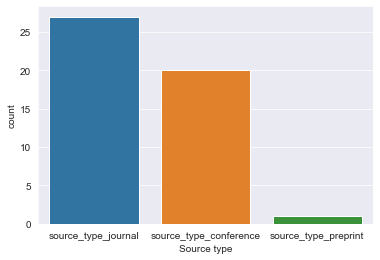

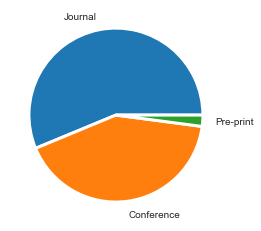

In [5]:
df_metadata=df_metadata.fillna('-')
df_metadata_sin_duplicates = df_metadata.drop_duplicates(subset='paper_id')

df_sources = df_metadata_sin_duplicates.iloc[:,7:10]
def get_value(row):
     for c in df_sources.columns:
         if row[c]== 'x':
             return c

df_sources = df_sources.apply(get_value, axis=1)
df_sources = pd.DataFrame(df_sources)
df_sources.columns = ['Source type']


#ploteo
quantity = df_sources['Source type'].value_counts()
df_quantity = pd.DataFrame(quantity)

sns.countplot(x='Source type', data=df_sources)
plt.show()


#pie plot
names = 'Journal', 'Conference', 'Pre-print'
plt.pie(df_quantity['Source type'], labels = names, labeldistance = 1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()


## Grafico base de datos

Incluir en un grafico, dentro de las bases de datos publicas, cada base de dato publica (AMIGOS, MAHNOB, etc.)
- cantidad total de papers: 101
- db publicas : 
- DEAP 10
- MAHNOB 7
- AMIGOS 7
- PMEmo 3
- Ascertein 2
- RECOLA 2
- Otros 7
db privadas : 

### Grafico: frecuencia de papers según tipo de base de datos usada, por año

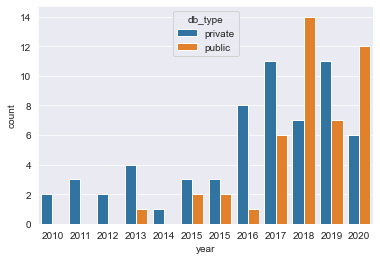

In [6]:
#rellenar datos faltantes y dropeo de duplicados
df_data_type=df_data_type.fillna('-')
df_data_type_sin_duplicates = df_data_type.drop_duplicates(subset='paper_id')

#ploteo
category_order = [2010, 2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]
sns.set_style('darkgrid')
sns.countplot(x='year', 
    data= df_data_type_sin_duplicates, 
    hue='db_type', 
    order=category_order)
plt.show()